# US Housing Market Analysis

In [98]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from kaleido.scopes.plotly import PlotlyScope
from bokeh.io import export_png
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading and cleaning data
We will be using data from our custom dataset, but we will be isolating the features that will most effectively and efficiently train our model. After rigorous testing, we have found that the following features are the most effective in training our model:
* 'Sentiment Index'
* 'Construction'
* 'Mortgage Rate'
* 'NASDAQ'
* 'Housing Starts'
* 'NFCI(National Financial Conditions Index)'

In [99]:
# Read in data
file_path = Path("data/housing_data4.csv")
df = pd.read_csv(file_path)
df.head()

,Date,Price Index,Mortgage Rate,Oil Price,NASDAQ,Lumber Price Index,Construction,Fed Funds Rate
0,1987-01-01,63.734,125.90971,18.65,384.227143,108.1,1090.0,6.43
1,1987-02-01,64.134,124.24761,17.75,411.712632,109.4,1096.0,6.10
2,1987-03-01,64.469,123.59781,18.30,432.204545,110.6,1084.0,6.13
3,1987-04-01,64.973,134.50752,18.68,422.771429,110.7,1079.0,6.37
4,1987-05-01,65.547,144.95212,19.44,416.634000,110.7,1070.0,6.85


In [100]:
df.tail()

,Date,Price Index,Mortgage Rate,Oil Price,NASDAQ,Lumber Price Index,Construction,Fed Funds Rate
428,2022-09-01,300.451,83.61149,84.26,11402.850000,322.849,1698.0,2.56
429,2022-10-01,298.672,94.39124,87.55,10801.494286,317.617,1710.0,3.08
430,2022-11-01,296.809,93.09166,84.37,10973.638095,312.864,1695.0,3.78
431,2022-12-01,294.266,87.05882,76.44,10838.995714,308.076,1696.0,4.10
432,2023-01-01,292.444,85.80711,78.12,11013.991000,306.461,1695.0,4.33


# Defining the feature and target variables

In [101]:
# Define features set
X = df.copy()
X = X.drop("Date", axis=1)
X = X.drop("Price Index", axis=1)
# drop first row
X = X.iloc[1:]
X.head()

,Mortgage Rate,Oil Price,NASDAQ,Lumber Price Index,Construction,Fed Funds Rate
1,124.24761,17.75,411.712632,109.4,1096.0,6.10
2,123.59781,18.30,432.204545,110.6,1084.0,6.13
3,134.50752,18.68,422.771429,110.7,1079.0,6.37
4,144.95212,19.44,416.634000,110.7,1070.0,6.85
5,144.15185,20.07,423.695909,111.4,1060.0,6.73


In [102]:
# checking the shape of X and if there are any null values
print(X.shape)
print(X.isnull().sum())

(432, 6)
Mortgage Rate         0
Oil Price             0
NASDAQ                0
Lumber Price Index    0
Construction          0
Fed Funds Rate        0
dtype: int64


# Creating the target vector 
Price Index = S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)

In [103]:
# Define target vector 'Price Change' as y
y = df["Price Index"].values.reshape(-1, 1)
y = y[1:]
y[:5]

array([[64.134],
       [64.469],
       [64.973],
       [65.547],
       [66.218]])

# Splitting the data into training and testing sets

In [104]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [105]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [106]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [107]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled.shape

(108, 6)

# Fitting the Random Forest model

Having scaled the data, we can now fit the Random Forest model to the training data.

In [108]:
# create the random forrest classifier instance
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

# Making predictions with the Random Forest model

In [109]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([107.033684, 274.537264,  92.83885 , 166.060936, 149.36926 ,
       123.42648 , 150.525928, 182.216534,  79.831708,  87.531896,
        82.864974,  76.488234, 168.744662,  76.612938,  77.104428,
       129.44345 , 229.148406,  76.348466,  66.995272,  76.27736 ,
       119.088666, 300.274154,  78.540378, 143.981416, 214.485486,
       143.47369 , 162.222238, 194.730316, 141.200308,  96.514982,
       150.370442, 153.377344, 252.80462 ,  82.967146, 147.512432,
       184.545216, 299.731564,  76.756064,  79.859952, 103.417126,
       148.878814, 129.475598,  79.8504  , 211.356166,  94.680954,
        74.017978,  94.342832, 182.290994, 143.856514, 177.735156,
        67.393864, 167.122792, 198.406318, 199.163464, 141.712436,
        72.513976, 151.464732, 124.076166, 225.503376,  69.663274,
       165.884666, 169.882978, 182.76071 ,  76.377768,  72.655164,
       166.005194,  65.437166,  89.205638, 138.565872,  76.517942,
       173.186418,  94.543634, 137.659016, 140.802644, 173.988

In [110]:
# compare predictions to actual values
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   [107.033684 274.537264  92.83885  166.060936 149.36926  123.42648
 150.525928 182.216534  79.831708  87.531896]
First 10 Actual labels: [[109.214], [276.07], [90.194], [164.278], [148.17], [123.68700000000001], [147.96], [182.472], [80.339], [86.31]]


# Evaluating the Random Forest model

In [111]:
# chart of predictions vs actual
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()})
# change the datatypes to float
results_df = results_df.astype("float64")
# add a column for the difference between the prediction and actual
results_df["Difference"] = results_df["Actual"] - results_df["Prediction"]
# add a column for the percent difference between the prediction and actual
results_df["Percent Difference"] = results_df["Difference"] / results_df["Actual"] * 100
# find the highest percent difference
results_df["Percent Difference"].max()
results_df.head(10)

,Prediction,Actual,Difference,Percent Difference
0,107.033684,109.214,2.180316,1.996370
1,274.537264,276.070,1.532736,0.555198
2,92.838850,90.194,-2.644850,-2.932401
3,166.060936,164.278,-1.782936,-1.085316
4,149.369260,148.170,-1.199260,-0.809381
5,123.426480,123.687,0.260520,0.210628
6,150.525928,147.960,-2.565928,-1.734204
7,182.216534,182.472,0.255466,0.140003
8,79.831708,80.339,0.507292,0.631439
9,87.531896,86.310,-1.221896,-1.415706


In [122]:
# use plotly express to create a histogram of the percent difference
fig = px.histogram(results_df, x="Percent Difference", title="Percent Difference Between Prediction and Actual")
fig.show()

In [123]:
# save the plot as a png file
scope = PlotlyScope()
with open("images/percent_difference_streamlined.png", "wb") as f:
    f.write(scope.transform(fig, format="png"))

In [112]:
# calculate the mean absolute error (MAE)
mae = results_df["Difference"].mean()
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: -0.04492507407404139


In [113]:
# calculate the mean squared error (MSE)
mse = results_df["Difference"].apply(lambda x: x**2).mean()
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 9.18154073985065


In [114]:
# calculate the root mean squared error (RMSE)
rmse = mse**(0.5)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 3.030105730803902


In [115]:
# calculate the mean absolute percent error (MAPE)
mape = results_df["Percent Difference"].abs().mean()
print(f"Mean Absolute Percent Error: {mape}")


Mean Absolute Percent Error: 1.168926543401063


In [116]:
#evaluate the model
# score the model
rf_model.score(X_test_scaled, y_test)


0.9973015645796661

# Feature importance

In [117]:
# get the feature importance array
importances = rf_model.feature_importances_
# list of features
feature_list = list(X.columns)
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, feature_list), reverse=True)
# print the feature importance
for feature in zip(feature_list, rf_model.feature_importances_):
    print(f"{feature[0]}: ({feature[1]})")
    

Mortgage Rate: (0.23194425460679285)
Oil Price: (0.14486465959028305)
NASDAQ: (0.17568113883411107)
Lumber Price Index: (0.36795128700330065)
Construction: (0.04158292953848094)
Fed Funds Rate: (0.037975730427031444)


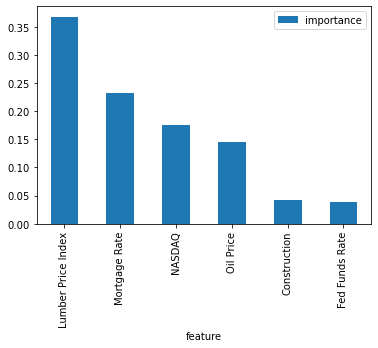

In [118]:
# add the feature importance to a dataframe
feature_importance_df = pd.DataFrame({"feature": feature_list, "importance": importances})
# sort the dataframe by the importance
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False)
# set the index to be the feature
feature_importance_df = feature_importance_df.set_index("feature", drop=True)
# plot the feature importance
feature_importance_df.plot(kind="bar")
plt.show()

In [119]:
# use plotly to create a bar chart of the feature importance
fig = px.bar(feature_importance_df, x=feature_importance_df.index, y="importance", title="Feature Importance", color="importance", color_continuous_scale=px.colors.sequential.Cividis_r)
# save the graph
fig.write_image("images/feature_importance_streamlined.png")
fig.show()

In [120]:
# define a function to output images of tables
def save_df_as_image(df, filename):
    source = ColumnDataSource(df)
    columns = [TableColumn(field=Ci, title=Ci) for Ci in df.columns]  # bokeh columns
    # add index column
    columns.insert(0, TableColumn(field="index", title="index"))
    # use df index as index column
    source.add(df.index, "index")
    data_table = DataTable(columns=columns, source=source, width=800, height=280)
    export_png(data_table, filename=filename)

In [121]:
# save a table of the feature importance
save_df_as_image(feature_importance_df, "images/feature_importance_streamlined_table.png")